## 使用PCA进行降噪

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size = 100)

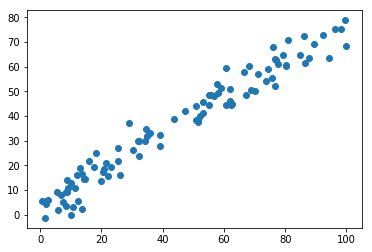

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components = 1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

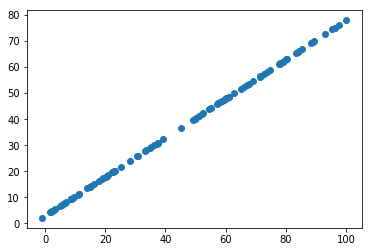

In [8]:
plt.scatter(X_restore[:,0],X_restore[:,1])

## 手写识别的例子

In [9]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [10]:
noisy_digits = X + np.random.normal(0, 4, size =X.shape)

In [11]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num = noisy_digits[y == num,:][:10]
    example_digits = np.vstack([example_digits,X_num])

In [12]:
example_digits.shape

(100, 64)

In [17]:
def plot_digits(data):
    fig, axes = plt.subplots(10,10,figsize=(10,10),
                            subplot_kw = {'xticks':[],'yticks':[]},
    gridspec_kw = dict(hspace = 0.1,wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap = 'binary', interpolation='nearest',
                  clim=(0, 16))

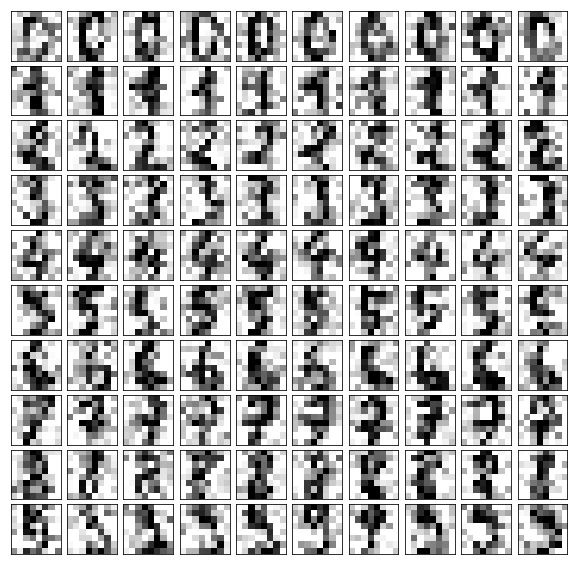

In [18]:
plot_digits(example_digits)

In [19]:
pca = PCA(0.5)

In [20]:
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.n_components_

12

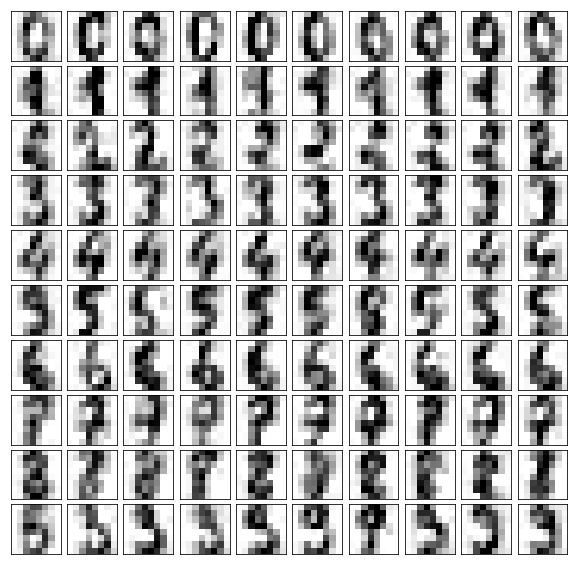

In [22]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

## 人脸识别与特征脸